#Intorduction to Convolutional Neural Networks and Computer Vision with TF

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of self-driving car recognizing the car in front.


## Get the data

The images we are working with are from food101 dataset :https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip


101 different classes of food


we modify that in only use two classes(pizza and steak) using the image data modification notebook:https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb


We started with smaller dataset so we can experiment quickly and figure what works before scaling up


In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-12-20 13:49:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 142.251.2.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   173MB/s    in 0.6s    

2023-12-20 13:49:05 (173 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data(become one with it)

A very crucial step at the begining of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of data

In [3]:
!ls pizza_steak


test  train


In [4]:
!ls pizza_steak/train/


pizza  steak


In [5]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [6]:
import os

# Walk through pizza_steak directory and list number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print (f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [7]:
# Another way to find how many images in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

# To visualize
our images first lets get the class names programaticlly

In [8]:
# Get the class names programaticlly
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #is created a list of class_names of subdirectory
print(class_names)

['pizza' 'steak']


In [9]:
#Lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  #Setup the target directorry(view image from here)
  target_folder = target_dir+target_class

  #Get random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  #Read in the image and plot it
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")#Show the shape

  return img

['1649108.jpg']
Image shape: (512, 512, 3)


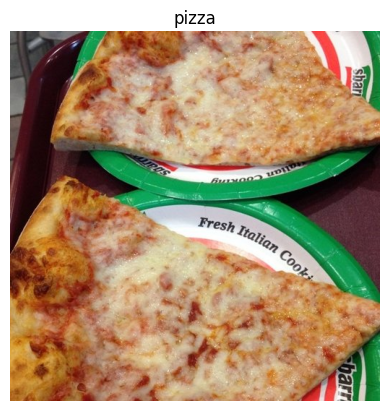

In [10]:
# View the random image from training dataset
img=view_random_image(target_dir="pizza_steak/train/",
                      target_class="pizza")

In [11]:
import tensorflow as tf
# The images we've imported and plooted are acutaaly arrayss.tensors of different pixel values
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 96, 100,  99],
        [ 98, 102, 101],
        [100, 102,  99],
        ...,
        [ 15, 136,  67],
        [ 19, 135,  70],
        [ 22, 138,  73]],

       [[ 96, 100,  99],
        [ 97, 101, 100],
        [100, 102,  99],
        ...,
        [ 28, 147,  79],
        [ 26, 142,  77],
        [ 15, 131,  66]],

       [[ 99, 101, 100],
        [ 99, 101, 100],
        [ 99, 101,  98],
        ...,
        [ 32, 151,  85],
        [ 31, 147,  84],
        [ 18, 132,  70]],

       ...,

       [[168,  95,  26],
        [168,  95,  26],
        [170,  98,  26],
        ...,
        [ 13, 134,  54],
        [ 17, 138,  58],
        [ 21, 142,  62]],

       [[172, 102,  32],
        [171, 101,  31],
        [174, 104,  32],
        ...,
        [ 15, 136,  56],
        [ 19, 140,  60],
        [ 22, 143,  63]],

       [[173, 103,  33],
        [172, 102,  32],
        [176, 106,  34],
        ...,
        [ 17, 138,  5

In [12]:
 #View the image shape
 img.shape #returns width height color channels

(512, 512, 3)

🔑 Note: As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255.

In [13]:
# Get all the pixel values beetwen 0 and 1
img/255.

array([[[0.37647059, 0.39215686, 0.38823529],
        [0.38431373, 0.4       , 0.39607843],
        [0.39215686, 0.4       , 0.38823529],
        ...,
        [0.05882353, 0.53333333, 0.2627451 ],
        [0.0745098 , 0.52941176, 0.2745098 ],
        [0.08627451, 0.54117647, 0.28627451]],

       [[0.37647059, 0.39215686, 0.38823529],
        [0.38039216, 0.39607843, 0.39215686],
        [0.39215686, 0.4       , 0.38823529],
        ...,
        [0.10980392, 0.57647059, 0.30980392],
        [0.10196078, 0.55686275, 0.30196078],
        [0.05882353, 0.51372549, 0.25882353]],

       [[0.38823529, 0.39607843, 0.39215686],
        [0.38823529, 0.39607843, 0.39215686],
        [0.38823529, 0.39607843, 0.38431373],
        ...,
        [0.1254902 , 0.59215686, 0.33333333],
        [0.12156863, 0.57647059, 0.32941176],
        [0.07058824, 0.51764706, 0.2745098 ]],

       ...,

       [[0.65882353, 0.37254902, 0.10196078],
        [0.65882353, 0.37254902, 0.10196078],
        [0.66666667, 0

## An end-to-end example

Lets build an CNN to find patterns in our images, more specificly we a need way to:

 * Load our images
 * Preprocces our images
 * Build a CNN to find patterns
 * Compile our CNN
 * Fit CNN to taining data

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#Preproceesing data(get all values beetween 0 adn 1, also calles normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

#Import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

#Build a CNN model(same as Tiny VGG on the CNN ecplainer website)
model_1= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 16s 152ms/step - loss: 0.6820 - accuracy: 0.6120 - val_loss: 0.5420 - val_accuracy: 0.6940
Epoch 2/5
47/47 [==============================] - 6s 136ms/step - loss: 0.4676 - accuracy: 0.7813 - val_loss: 0.4114 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 5s 115ms/step - loss: 0.4222 - accuracy: 0.8153 - val_loss: 0.3590 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 8s 163ms/step - loss: 0.3722 - accuracy: 0.8393 - val_loss: 0.4719 - val_accuracy: 0.7540
Epoch 5/5
47/47 [==============================] - 5s 116ms/step - loss: 0.3551 - accuracy: 0.8507 - val_loss: 0.3122 - val_accuracy: 0.8680


** **NOTE** ** If THE ABOVE CELL IS TAKING LONOGER THAN 10 SECONDS PER EPOCH MAKE SURE YOU are using GPU

In [15]:
#Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

CNN explainer

## Using the same model as before

In [16]:
tf.random.set_seed(42)

#Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#Compile
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 124ms/step - loss: 0.6951 - accuracy: 0.4607 - val_loss: 0.6931 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 6s 134ms/step - loss: 0.6932 - accuracy: 0.4787 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 104ms/step - loss: 0.6932 - accuracy: 0.5027 - val_loss: 0.6931 - val_accuracy: 0.5020
Epoch 4/5
47/47 [==============================] - 5s 107ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5020
Epoch 5/5
47/47 [==============================] - 6s 125ms/step - loss: 0.6932 - accuracy: 0.4907 - val_loss: 0.6931 - val_accuracy: 0.5020


In [17]:
#Get a summary of model 2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more paramaters tha our CNN (model_1),model_2 performs terably.... lets improve it

In [18]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 130ms/step - loss: 3.7991 - accuracy: 0.6293 - val_loss: 0.6298 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 6s 128ms/step - loss: 1.4334 - accuracy: 0.6740 - val_loss: 0.7032 - val_accuracy: 0.7580
Epoch 3/5
47/47 [==============================] - 6s 130ms/step - loss: 0.7364 - accuracy: 0.7200 - val_loss: 0.5039 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 5s 106ms/step - loss: 1.0744 - accuracy: 0.6747 - val_loss: 0.8201 - val_accuracy: 0.6340
Epoch 5/5
47/47 [==============================] - 6s 135ms/step - loss: 0.5355 - accuracy: 0.7713 - val_loss: 0.6641 - val_accuracy: 0.6780


In [19]:
#Get a summary of model 3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


🔑 Note: You can think of trainable parameters as **patterns a model can learn from data**. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image.** So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different features in an image.

## Binary classification: Lets break it down

1. Become one with data(visualize,visualize)
2. Preprocess the data(prepared it for our model(normalizing))
3. Create a model(start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model
7. Repeat until satisfied(experiment)

#Become one with data

['330182.jpg']
Image shape: (384, 512, 3)
['764429.jpg']
Image shape: (341, 512, 3)


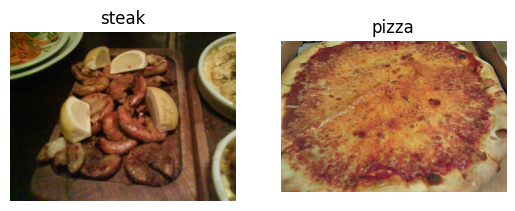

In [20]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
steak_img = view_random_image("pizza_steak/train/","pizza")

#Preprocess the data

In [21]:
#Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**

Batch is a small subset of data. Rather than look at the  10 000 images at one time, a model might look at 32 at a time

It does this for a couple of reasons:
1. 10 000 (or more)might not fit into memory of gpu
2. Trying to learn the patterns in 10,000 images in one hit could result the model not being able to learn very well

Why 32?

Because 32 is good for your health

In [22]:
#Create train and test data generetors and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [23]:
train_data = train_datagen.flow_from_directory(directory=train_dir, #Target directory of images
                                               target_size=(224,224), #Target size of images(height, width)
                                               class_mode="binary", #type of data youre working with
                                               batch_size=32) #Size of minibatches to load data into

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [24]:
#Get a sample of a train data batch
images,labels = train_data.next() #get the next batch of images labels in train_data
len(images),len(labels)

(32, 32)

In [25]:
#How many batches are there?
len(train_data)

47

In [26]:
1500/32 #1500 images divided by 32 batch size

46.875

In [27]:
#Get the first two
images[:2],images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [28]:
images[7].shape

(224, 224, 3)

In [29]:
#View the first batch of labels[pizza or steak]
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### Create a CNN model

In [30]:
#Make the creating of our model little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense ,Flatten ,Conv2D , MaxPool2D , Activation
from tensorflow.keras import Sequential



In [31]:
#Create the model
model_4 = Sequential([
    Conv2D(filters=10, #filter is the number of sliding windows going across an input(higher = more complex model)
           kernel_size=3, #the size of the sliding window going across an input
           strides=1, #the size of the step sliding window takes across an input
           padding="valid", #if "same", output shape is same as input shape, if "valid" output shape gets compressed
           activation="relu",
           input_shape=(224,224,3)), #input layers(specify input shape)
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid") #output layer (working with binary classification so only one output)
])

In [32]:
#Compile
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [33]:
#Get the summary
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
#Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 128ms/step - loss: 0.9114 - accuracy: 0.6673 - val_loss: 0.4394 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 6s 134ms/step - loss: 0.4440 - accuracy: 0.8020 - val_loss: 0.4832 - val_accuracy: 0.7660
Epoch 3/5
47/47 [==============================] - 5s 114ms/step - loss: 0.3009 - accuracy: 0.8913 - val_loss: 0.3473 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 5s 112ms/step - loss: 0.1676 - accuracy: 0.9553 - val_loss: 0.3478 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 7s 150ms/step - loss: 0.0724 - accuracy: 0.9833 - val_loss: 0.4512 - val_accuracy: 0.8220


In [35]:
model_1.evaluate(test_data)

16/16 [==============================] - 1s 79ms/step - loss: 0.3122 - accuracy: 0.8680


[0.31218206882476807, 0.8679999709129333]

In [36]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

### Evaluating our model

Its look like our model is learning something, lets evaluate it

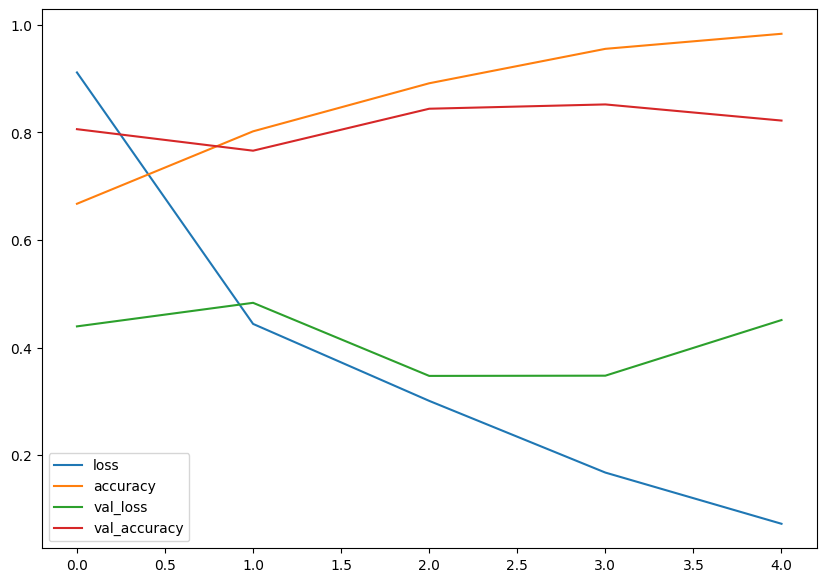

In [37]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [38]:
#Plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  Returns seperat loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs =range(len(history.history["loss"]))

  #Plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

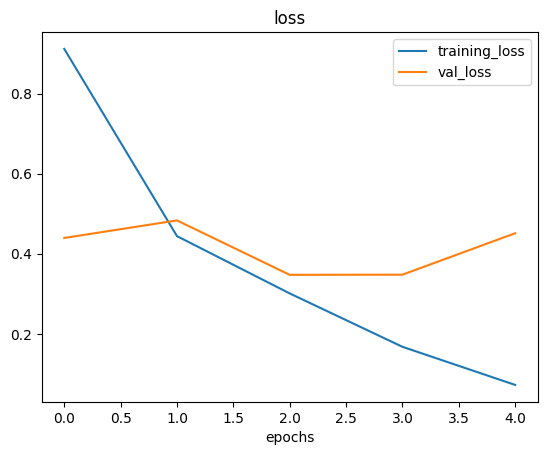

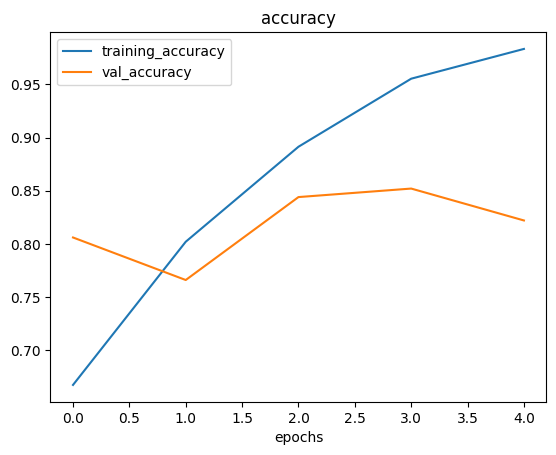

In [39]:
#Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

**Validation loss starts to increase**
its likely the model is **overfitting**.This means its learning the patterns in the training dataset to well and models ability to gerelize to unseen data will be diminished(umanjena).

## Adjust the model parameters

Fiting a machine learning model comes in 3 stepts

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to reduce overfitting
* Increase the number of conv layers
* Increase the number of conv filters
* Add another Dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers(such as MaxPool2d)
* Add more data

**Note:** Reducing overfitting is also knowing as **regularization**

In [40]:
#Crete the model(this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [41]:
#Compile
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [42]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 142ms/step - loss: 0.6614 - accuracy: 0.5980 - val_loss: 0.5425 - val_accuracy: 0.7100
Epoch 2/5
47/47 [==============================] - 5s 112ms/step - loss: 0.5033 - accuracy: 0.7720 - val_loss: 0.4037 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 6s 119ms/step - loss: 0.4332 - accuracy: 0.8047 - val_loss: 0.3462 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 6s 123ms/step - loss: 0.4020 - accuracy: 0.8320 - val_loss: 0.3358 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 6s 132ms/step - loss: 0.3859 - accuracy: 0.8247 - val_loss: 0.3205 - val_accuracy: 0.8600


In [43]:
#Get sumaary()
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

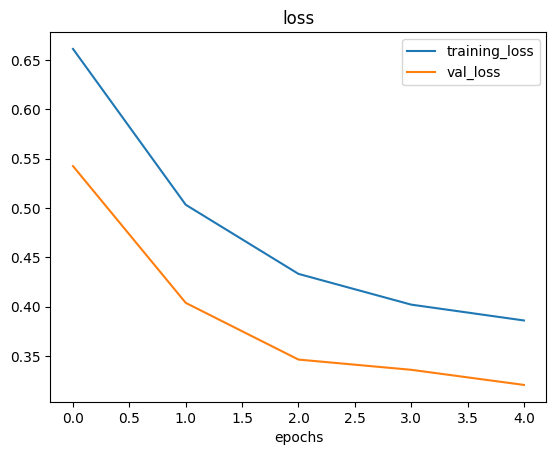

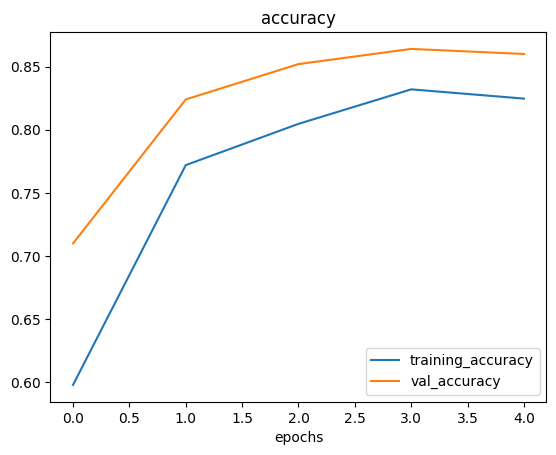

In [44]:
#Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [45]:
#Create ImageDataGenerator training instant with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, #How much do you want to eotate it
                                             shear_range=0.2, #how much do you want to shear image
                                             zoom_range=0.2, #zoom in randomly on image
                                             width_shift_range=0.2, #move your image around on x-axis
                                             height_shift_range=0.2, #move you image on y-axis
                                             horizontal_flip=True) #Do you want to flip the image
#Createa ImageDataGenretor wothput data augmentaion
train_datagen = ImageDataGenerator(rescale=1/255.)

#Create ImageDataGenrator wothout augmentaion for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

What is data augmentaion?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizeble patterns.Altering mean adjuting the rotation of an image , flipping it, cropping it or something

In [46]:
#Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) #For demonstation purposes only
#Create non augmented data batches
print("Non augmented train data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE=(224,224)
print("Non augmented test data: ")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(IMG_SIZE),
                                             batch_size=32,
                                             class_mode="binary")


Augmented training data
Found 1500 images belonging to 2 classes.
Non augmented train data
Found 1500 images belonging to 2 classes.
Non augmented test data: 
Found 500 images belonging to 2 classes.


🔑 Note: Data augmentation is usally only performed on the training data. Using the ImageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

# Lets visualize some augmented data

In [47]:
images,labels = train_data.next()
augmented_images,augmented_labels = train_data_augmented.next()#labels arent augmented only images

Showing image number: 7


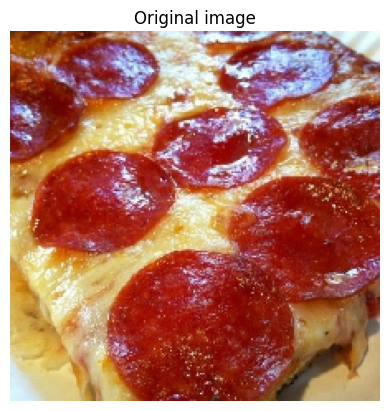

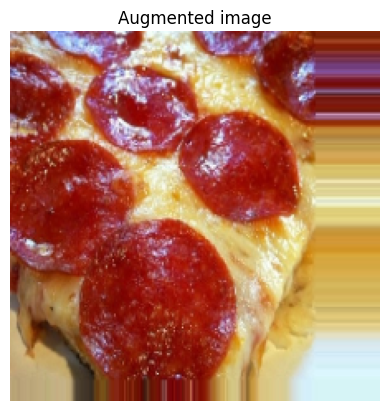

In [48]:
#Show the original image and augmented image
random_number = random.randint(0,32)
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

We seen what augmented data look like, lets build a model who learn from augmented data

In [49]:
model_6 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 450ms/step - loss: 0.7002 - accuracy: 0.4720 - val_loss: 0.6879 - val_accuracy: 0.5400
Epoch 2/5
47/47 [==============================] - 20s 423ms/step - loss: 0.7047 - accuracy: 0.4380 - val_loss: 0.6900 - val_accuracy: 0.4980
Epoch 3/5
47/47 [==============================] - 21s 453ms/step - loss: 0.7024 - accuracy: 0.5067 - val_loss: 0.6882 - val_accuracy: 0.5620
Epoch 4/5
47/47 [==============================] - 20s 426ms/step - loss: 0.6923 - accuracy: 0.5660 - val_loss: 0.6732 - val_accuracy: 0.6580
Epoch 5/5
47/47 [==============================] - 21s 459ms/step - loss: 0.6883 - accuracy: 0.6047 - val_loss: 0.6185 - val_accuracy: 0.6980


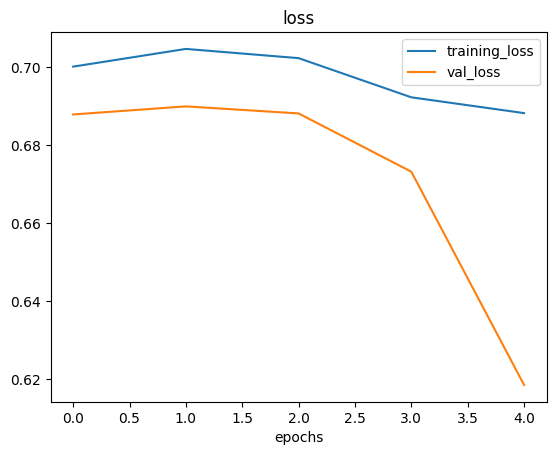

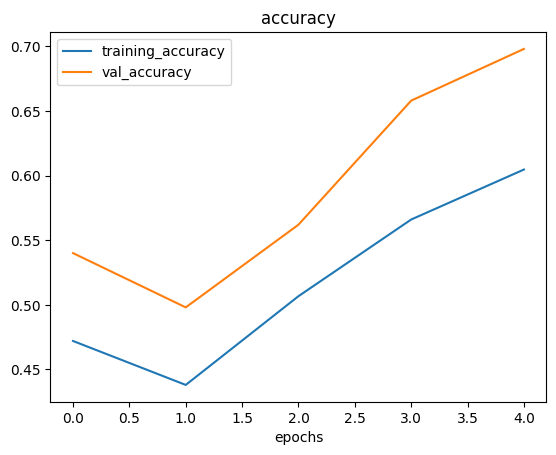

In [50]:
#Check our models curves
plot_loss_curves(history_6)

Lets shuffle our augmented training data and train another model on it and see what happens

In [51]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224,224),
                                                                            batch_size=32,
                                                                            class_mode="binary",
                                                                            shuffle=True)
#Create non augmented data batches

Found 1500 images belonging to 2 classes.


In [52]:
#Create the model same as model_6
model_7 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 459ms/step - loss: 0.6629 - accuracy: 0.5773 - val_loss: 0.5447 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 20s 426ms/step - loss: 0.5740 - accuracy: 0.7080 - val_loss: 0.4102 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 23s 489ms/step - loss: 0.5350 - accuracy: 0.7420 - val_loss: 0.4021 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 22s 460ms/step - loss: 0.4956 - accuracy: 0.7727 - val_loss: 0.3772 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 21s 444ms/step - loss: 0.4896 - accuracy: 0.7667 - val_loss: 0.3590 - val_accuracy: 0.8360


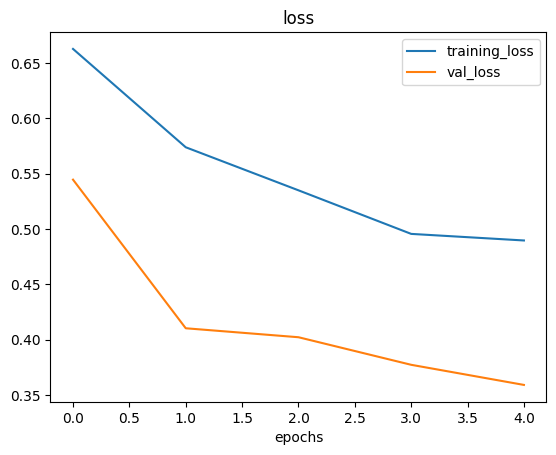

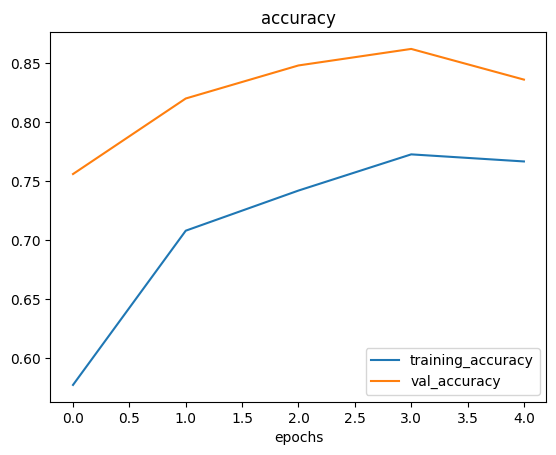

In [53]:
plot_loss_curves(history_7)

### Repeat until satisfed

Since we are alredy beaten our baseline there are few thing we could try to continue imporve our model:

* Increase the number of model layers(convs,maxpool)
* Increase the number of filters in each conv layer(from 10 to 32,64)
* Train for longer(more epochs)
* Find the ideal learning rate
* Get more data(give the model more oportunities to learn)
* Use **transfer learning** to leverage what image model has learn and adjust it for our own use case

> **Practice**: recreate the model on the CNN explainer website(same as model 1) and see how it performs on augmented shuffeled training data

In [54]:
model_8 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [55]:
model_8.compile(loss="binary_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])


In [75]:
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 21s 449ms/step - loss: 0.4961 - accuracy: 0.7733 - val_loss: 0.4446 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 24s 516ms/step - loss: 0.4923 - accuracy: 0.7673 - val_loss: 0.3784 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 21s 449ms/step - loss: 0.4568 - accuracy: 0.7973 - val_loss: 0.3295 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 23s 484ms/step - loss: 0.4480 - accuracy: 0.8033 - val_loss: 0.3475 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 22s 459ms/step - loss: 0.4363 - accuracy: 0.7947 - val_loss: 0.3518 - val_accuracy: 0.8480


In [57]:
print(class_names)

['pizza' 'steak']


--2023-12-20 14:00:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.03s   

2023-12-20 14:00:52 (59.0 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



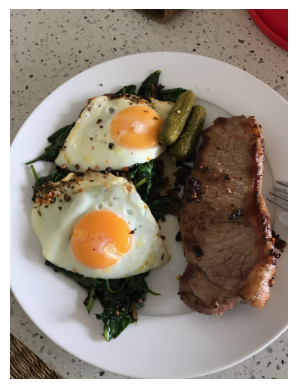

In [59]:
#View our example
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [60]:
#Check the shape of our image
steak.shape

(4032, 3024, 3)

In [63]:
expanded_steak = tf.expand_dims(steak,axis=0)
expanded_steak.shape

TensorShape([1, 4032, 3024, 3])

Note: For your model to make predictions on unseen data, for example, your own custom images, the custom image has to be in the same shape as your model has been trained on. In more general terms, to make predictions on custom data it has to be in the same form that your model has been trained on.

In [66]:
def load_and_prep_image(filename,img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshape it to (img_shape,colour channel)
  """
  #Read the image
  img = tf.io.read_file(filename)
  #Decode the read file into a tensor
  img= tf.image.decode_image(img)
  #Resize the image
  img = tf.image.resize(img,size=[img_shape,img_shape])
  #Rescale the image (get all values beetween 0 and 1)
  img = img/255.
  return img

In [70]:
#Load and preprocees our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [80]:
pred = model_8.predict(tf.expand_dims(steak,axis=0))

1/1 [==============================] - 0s 19ms/step


Look like our custom image is being put throuh our model, however it currenlty outputs a prediction probability, wouldnt it be nice if we could visualize the image as well as the models prediciton?

In [81]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [82]:
#We can index the predicted class by rounding the prediction probability and indexing it on class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [83]:
def pred_and_plot(model,filename,class_names=class_names):
  """
  Import an image located the filename, makes a prediction with model
  and plots the image with the predicted class as the title
  """
  #Import the target image and preprocees it
  img = load_and_prep_image(filename)

  #Make a prediciton
  pred = model.predict(tf.expand_dims(img,axis=0))

  #Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


1/1 [==============================] - 0s 115ms/step


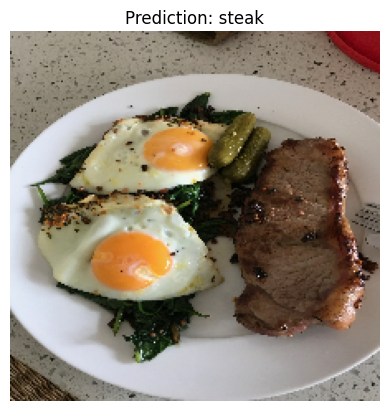

In [84]:
pred_and_plot(model_8,"03-steak.jpeg")

Our model works! lets try on antoher image

--2023-12-20 14:24:37--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.04s   

2023-12-20 14:24:37 (74.0 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 29ms/step


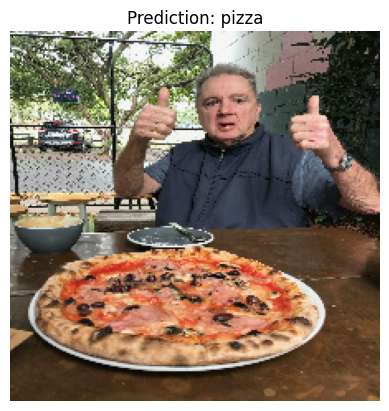

In [85]:
#Downloading another test custom and make prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_8,"03-pizza-dad.jpeg")

--2023-12-20 14:29:40--  ftp://c/UsersAdminDesktoppizza.jpg
           => ‘UsersAdminDesktoppizza.jpg’
Resolving c (c)... failed: Name or service not known.
wget: unable to resolve host address ‘c’
1/1 [==============================] - 0s 32ms/step


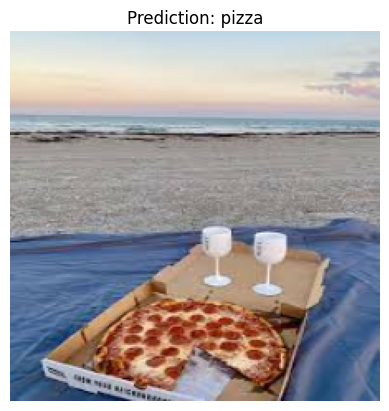

In [87]:
!wget C:\Users\Admin\Desktop\pizza.jpg
pred_and_plot(model_8,"pizza.jpg")

#Multi-class image classification

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create the model (start with baseline)
4. Fit the model  (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and imporve model
7. Repeat until satisfied

## 1. impot and become one with the data

In [89]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-12-20 14:39:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c0b::cf, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   206MB/s    in 2.4s    

2023-12-20 14:39:43 (206 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [91]:
#Unzip
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

In [95]:
import os
#Walk through 10 classes of food image data

for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'. ")

There are 2 directories and 0 images in '10_food_classes_all_data'. 
There are 10 directories and 0 images in '10_food_classes_all_data/test'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'. 
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.

In [96]:
#Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [97]:
#Lets get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['2408368.jpg']
Image shape: (384, 512, 3)


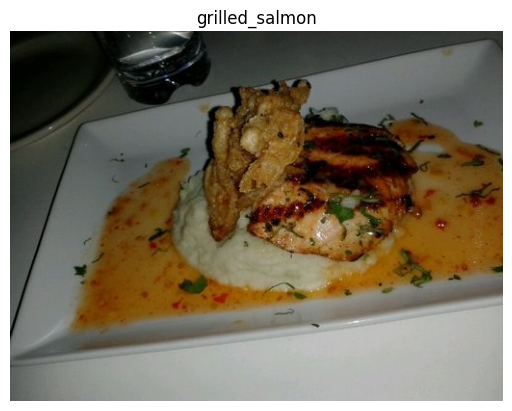

In [120]:
import random
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

### 2. Preprocess the data

In [121]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescale

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory=train_dir, #Target directory of images
                                               target_size=(224,224), #Target size of images(height, width)
                                               class_mode="categorical", #type of data youre working with
                                               batch_size=32) #Size of minibatches to load data into

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             class_mode="categorical",
                                             batch_size=32)



Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model(start with a baseline)

In [142]:
model_9 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 32s 127ms/step - loss: 2.2092 - accuracy: 0.1792 - val_loss: 2.0120 - val_accuracy: 0.2984
Epoch 2/5
235/235 [==============================] - 32s 137ms/step - loss: 1.8776 - accuracy: 0.3504 - val_loss: 1.9495 - val_accuracy: 0.3088
Epoch 3/5
235/235 [==============================] - 37s 157ms/step - loss: 1.5099 - accuracy: 0.4936 - val_loss: 1.9910 - val_accuracy: 0.3476
Epoch 4/5
235/235 [==============================] - 28s 120ms/step - loss: 0.9596 - accuracy: 0.6799 - val_loss: 2.3220 - val_accuracy: 0.3300
Epoch 5/5
235/235 [==============================] - 32s 138ms/step - loss: 0.4177 - accuracy: 0.8707 - val_loss: 3.2632 - val_accuracy: 0.2924


### 5. Evaluating the model

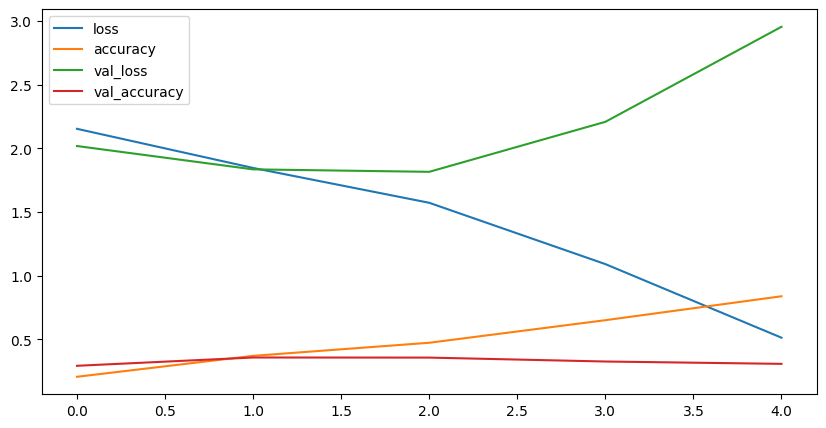

In [127]:
import pandas as pd
pd.DataFrame(history_9.history).plot(figsize=(10,5));

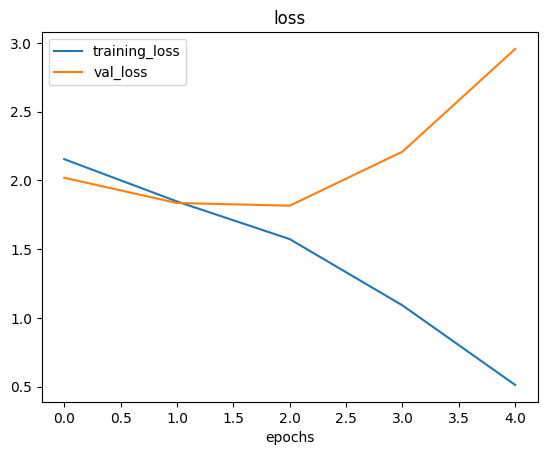

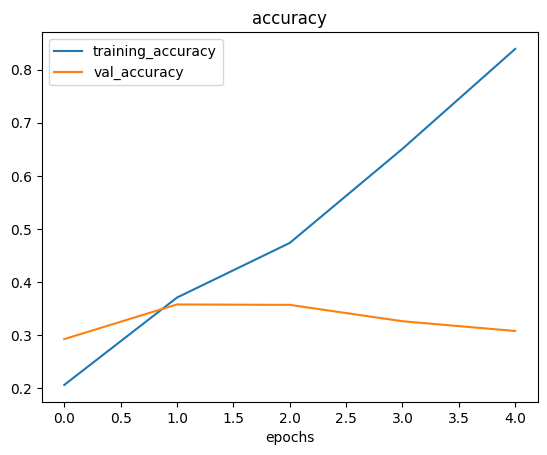

In [131]:
plot_loss_curves(history_9)

In [130]:
model_9.evaluate(test_data)

79/79 [==============================] - 8s 104ms/step - loss: 2.9554 - accuracy: 0.3080


[2.9554412364959717, 0.30799999833106995]

What do these loss curves tel us?

Well it seems our model is overfitting the training set quite badly... in other words, its getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset

##6. Adjust the model hyperparameters

Due to its performance on training data its clear our model is learning something


However its not generalizing well to unseen data(overfitting)

So lets try and fix overfitting by...
* **Get more data**-having more data gives a model more oprtunity to learn diverse patterns
* **Simply the model** - if our current model is overfitting the data, it may be too complicated of a model,one way to simplify a model is to reduce the number of layers or reduce a number of hidden units
* **Use data augmentation**- data augmentaion manipulates training data in such a way to add more diversity to it
* **Use Transfer learning** - transfer learning leverges the patterns another model has learned on similar data to your own and allows you to use those patterns on your dataset

In [143]:

model_9.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_35 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_36 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_37 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 53, 53, 10)        0         
 ng2D)                                               

In [136]:
#How about we try and simplify the model first?
#Lets try to remove 2 conv layers
model_10 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

model_10.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])


In [137]:
model_10.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 flatten_11 (Flatten)        (None, 29160)             0         
                                                                 
 dense_16 (Dense)            (None, 10)              

In [138]:
history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 30s 119ms/step - loss: 2.1843 - accuracy: 0.2276 - val_loss: 1.9826 - val_accuracy: 0.2896
Epoch 2/5
235/235 [==============================] - 28s 117ms/step - loss: 1.8779 - accuracy: 0.3471 - val_loss: 1.9441 - val_accuracy: 0.3104
Epoch 3/5
235/235 [==============================] - 28s 120ms/step - loss: 1.6427 - accuracy: 0.4475 - val_loss: 1.9546 - val_accuracy: 0.3324
Epoch 4/5
235/235 [==============================] - 27s 117ms/step - loss: 1.2197 - accuracy: 0.6024 - val_loss: 2.1019 - val_accuracy: 0.3172
Epoch 5/5
235/235 [==============================] - 29s 123ms/step - loss: 0.7407 - accuracy: 0.7764 - val_loss: 2.5164 - val_accuracy: 0.2976


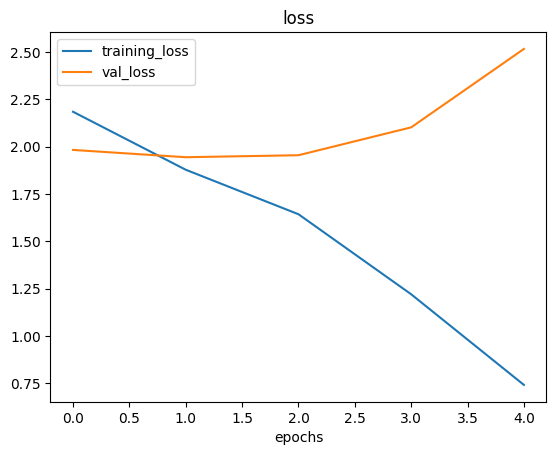

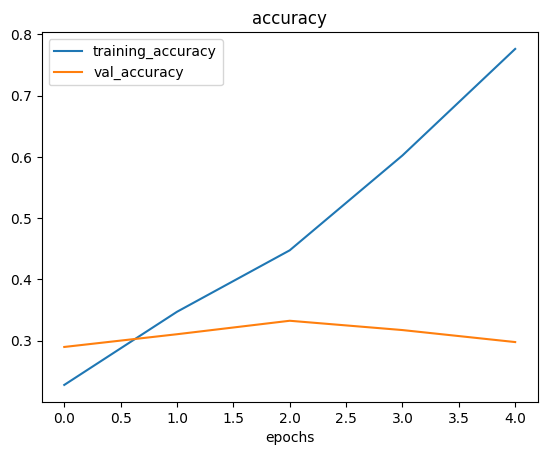

In [139]:
plot_loss_curves(history_10)

In [140]:
model_10.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 flatten_11 (Flatten)        (None, 29160)             0         
                                                                 
 dense_16 (Dense)            (None, 10)              

In [144]:
model_9.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_35 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_36 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_37 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 53, 53, 10)        0         
 ng2D)                                               

Looks like our simplifying model experiment didnt go well, because our loss go up and accuracy go down

## Trying to reduce overfitting with data augmentation

###Trying to reduce overfitting with data augmentation
Ideally we want to:
* Reduce overfitting
* Improve validation accuracy

In [152]:
train_data_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=0.2,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True)

train_data_augmented = train_data_augmented.flow_from_directory(train_dir,
                                                                target_size=(224,224),
                                                                batch_size=32,
                                                                class_mode="categorical")



Found 7500 images belonging to 10 classes.


In [153]:
#Lets create model but this time fit on augmented data
model_11 = tf.keras.models.clone_model(model_9)

# Compile the cloned model(using the same setup as previous models
model_11.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])


In [159]:
history_11 = model_11.fit(train_data_augmented,
                          epochs=10,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 118s 500ms/step - loss: 1.9110 - accuracy: 0.3421 - val_loss: 1.6962 - val_accuracy: 0.4292
Epoch 2/10
 73/235 [========>.....................] - ETA: 1:09 - loss: 1.8857 - accuracy: 0.3467

KeyboardInterrupt: ignored

In [157]:
model_9.evaluate(test_data)

79/79 [==============================] - 8s 95ms/step - loss: 3.2632 - accuracy: 0.2924


[3.263178825378418, 0.2924000024795532]

In [155]:
model_11.evaluate(test_data)

79/79 [==============================] - 11s 142ms/step - loss: 1.7635 - accuracy: 0.4064


[1.763543963432312, 0.40639999508857727]

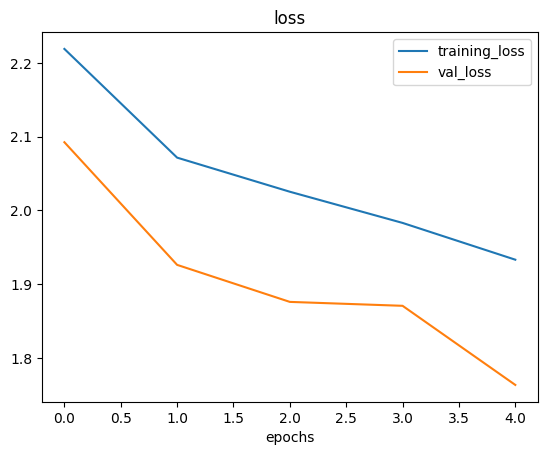

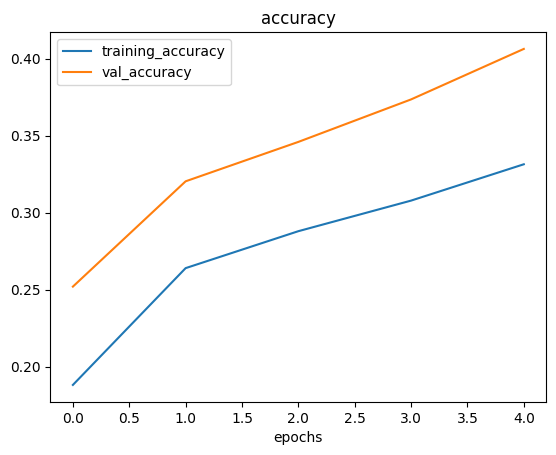

In [156]:
#Check the model trained on augmented data
plot_loss_curves(history_11)

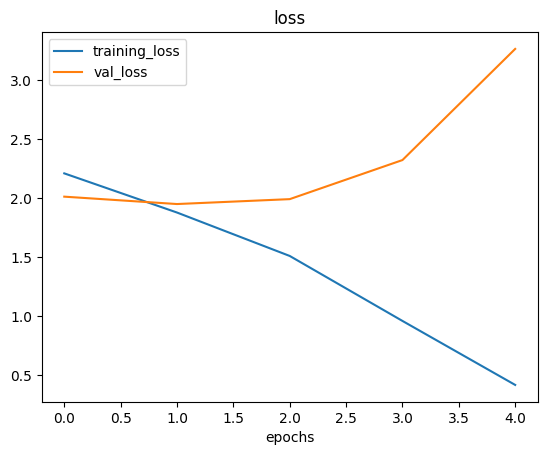

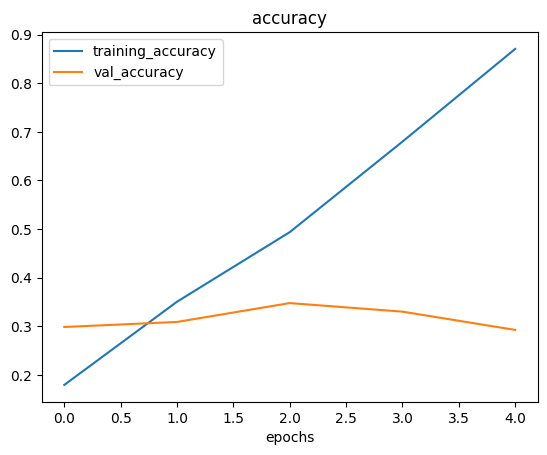

In [158]:
plot_loss_curves(history_9)

#We got the right way!!!
Los curves are much closer to each other than the baseline model and look like they are heading in right direction. So if were to train longer maybe will be more better

### Repeat until satisfied

We could keep going here. Restructuring our model's architecture, adding more layers, trying it out, adjusting the learning rate, trying it out, trying different methods of data augmentation, training for longer. But as you could image, this could take a fairly long time.

Good thing there's still one trick we haven't tried yet and that's transfer learning.

However, we'll save that for the next notebook where you'll see how rather than design our own models from scratch we leverage the patterns another model has learned for our own task.

In the meantime, let's make a prediction with our trained multi-class model.

### Making a prediction with our trained model

In [160]:
#Remind ourselves of the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [161]:
#Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2023-12-20 16:29:57--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.04s   

2023-12-20 16:29:58 (79.8 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2023-12-20 16:29:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting res

In [164]:
list(class_names)

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [181]:
#Reconfig pred_and_plot to work with multiclass
def pred_and_plot(model,filename,class_names=class_names):
  """
  Import an image located the filename, makes a prediction with model
  and plots the image with the predicted class as the title
  """
  #Import the target image and preprocees it
  img = load_and_prep_image(filename)

  #Make a prediciton
  pred = model.predict(tf.expand_dims(img,axis=0))

  #Add in logic for multi-class
  if len(pred[0])>1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    #Get the predicted class
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


1/1 [==============================] - 0s 18ms/step


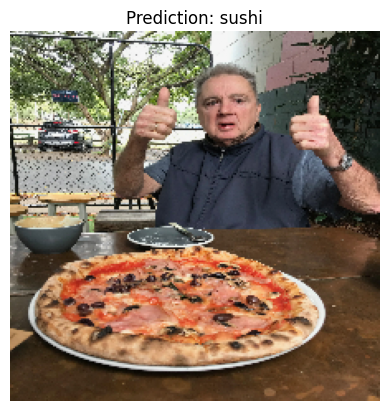

In [182]:
#Make a prediciton using model 11
pred_and_plot(model_11,filename="03-pizza-dad.jpeg",class_names=class_names)

1/1 [==============================] - 0s 26ms/step


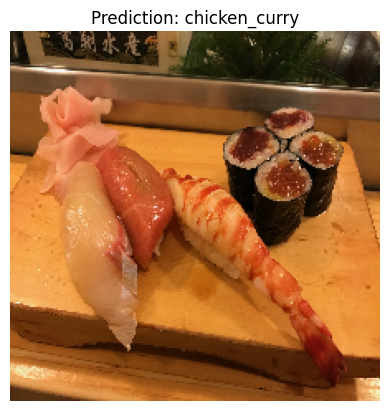

In [183]:
#Make a prediciton using model 11
pred_and_plot(model_11,filename="03-sushi.jpeg",class_names=class_names)

1/1 [==============================] - 0s 33ms/step


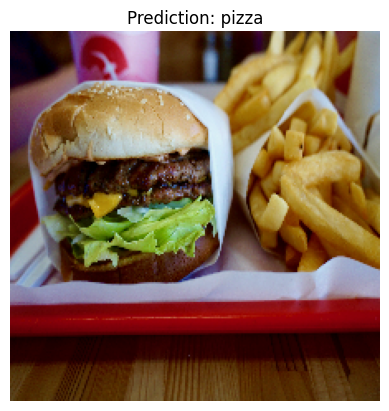

In [184]:
#Make a prediciton using model 11
pred_and_plot(model_11,filename="03-hamburger.jpeg",class_names=class_names)

1/1 [==============================] - 0s 25ms/step


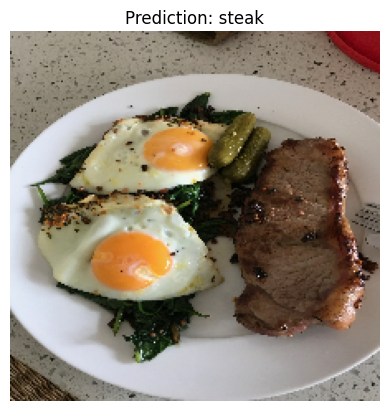

In [185]:
#Make a prediciton using model 11
pred_and_plot(model_11,filename="03-steak.jpeg",class_names=class_names)

## Saving and loading our model

In [186]:
#Save a model
model_11.save("saved_trained_model_11")

In [187]:
#Load in a trained model and evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_trained_model_11")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 9s 109ms/step - loss: 1.7140 - accuracy: 0.4256


[1.714009404182434, 0.42559999227523804]

In [188]:
#Compared our laoded model to our existing model
model_11.evaluate(test_data)

79/79 [==============================] - 8s 101ms/step - loss: 1.7140 - accuracy: 0.4256


[1.714009404182434, 0.42559999227523804]

### The models are same !!!